# TODO: CLEAN UP!

In [71]:
#To plot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.animation import PillowWriter
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
from scipy import interpolate
from matplotlib import gridspec
from matplotlib import cm
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors

import seaborn as sns

In [72]:
import os
home = os.path.expanduser("~")

In [3]:
#fetches the defined dataframes from fetch_df.py and turn them into pandas dataframes
#df_sc contains the full test partitioning and df_2021 contains predictions that would have been published during 2021 

from fetch_df import sc_all

pd.df_sc = sc_all()


pr_46_cm_ensemble_genetic_test.parquet


In [4]:


from fetch_df import sc_2021

pd.df_2021 = sc_2021()

pr_46_cm_ensemble_genetic_test.parquet


In [5]:
df = pd.df_sc

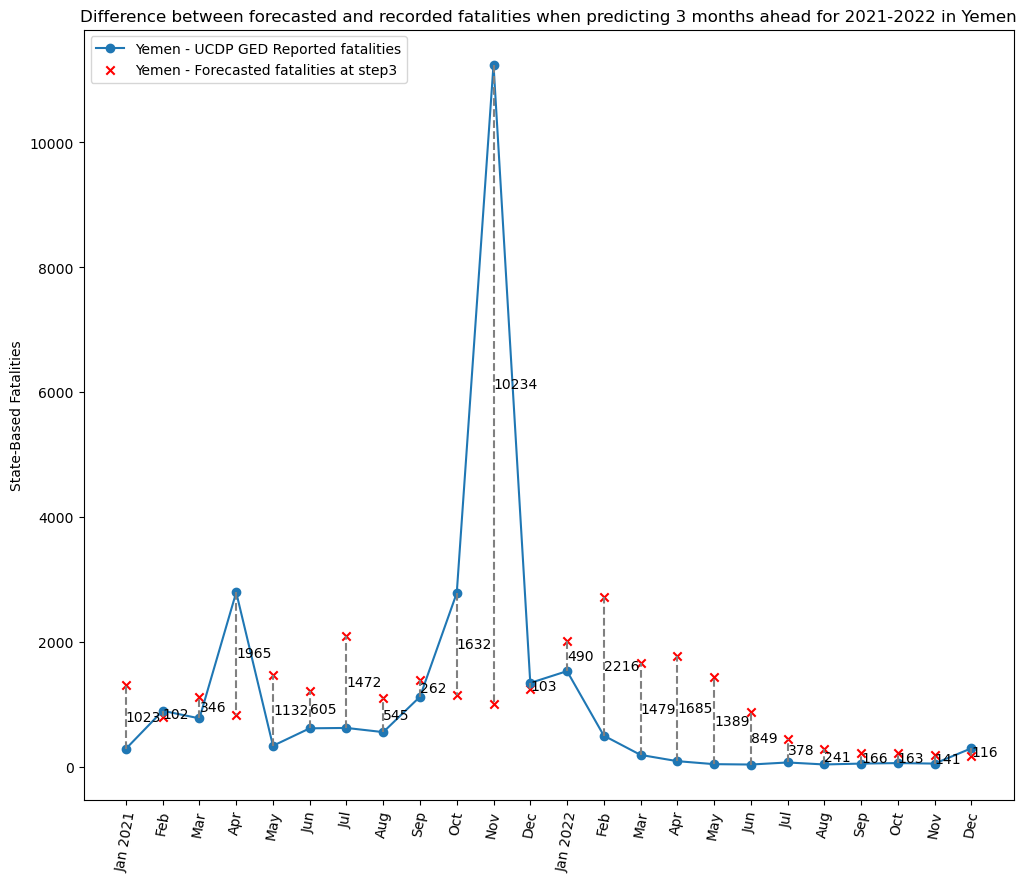

In [14]:
# Countries Kenya, DRC, Nigeria, Somalia, Ethiopia, Burkina Faso, Mali, Niger och något i Middle East? Libanon, Yemen
#237,237,Kenya, 167,167,"Congo, DRC", 79,79,Nigeria, 120,120,Somalia, 57,57,Ethiopia, 47,47,Burkina Faso, 50,50,Mali, 78,78,Niger, 94,94,Lebanon, 124,124,Yemen

countries_to_plot = [(124,'Yemen')]  # Replace 'Country1' and 'Country2' with actual country names

# Define the range of month_ids you want to include
start_month_id = 493 # 2021-01
end_month_id = 516 # 2022-12
month_ids_to_plot = [month_id for month_id in range(start_month_id, end_month_id + 1)]

month_ticks = ['Jan 2021', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2022', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ids_ticks = range(start_month_id, end_month_id + 1)

# Plotting loop
#plt.figure(figsize=(12, 10))
for country_id, country_name in countries_to_plot:
    plt.figure(figsize=(12, 10))
    subset = df.loc[(slice(None), country_id), :]
    
    # Filter the data for the specified month range
    subset_filtered = subset[subset.index.get_level_values('month_id').isin(month_ids_to_plot)]
    
    # Un-log ln_ged_sb_dep values and plot as a line graph
    plt.plot(subset_filtered.index.get_level_values('month_id'), np.expm1(subset_filtered['ln_ged_sb_dep']), label=f'{country_name} - UCDP GED Reported fatalities', marker='o', linestyle='-')
    
    # Adding dots for additional columns within the defined month range
    for month_id in month_ids_to_plot:
        column_name = f'sc_{month_id - 3}'
        # Check if the column exists before attempting to access it
        if column_name in df.columns:
            value = np.expm1(subset.loc[month_id, column_name].iloc[0])  # Un-log the value
            plt.scatter(month_id, value, marker='x', color='red', label='_nolegend_')  # Set the color to red and use '_nolegend_' to exclude from legend
            # Connect the dot with a dashed line to the line graph
            plt.plot([month_id, month_id], [np.expm1(subset_filtered.loc[month_id, 'ln_ged_sb_dep'].iloc[0]), value], linestyle='--', color='gray')
            
            # Calculate and display the absolute difference as text next to the dashed line
            diff = np.abs(value - np.expm1(subset_filtered.loc[month_id, 'ln_ged_sb_dep'].iloc[0]))
            plt.text(month_id, (value + np.expm1(subset_filtered.loc[month_id, 'ln_ged_sb_dep'].iloc[0])) / 2, f'{diff:.0f}', color='black', ha='left', va='center')

    # Manually add legend entry for the scatter plot label outside the loop
    plt.scatter([], [], marker='x', color='red', label=f'{country_name} - Forecasted fatalities at step3')
    
    # Customize plot for each country
    plt.title(f'Difference between forecasted and recorded fatalities when predicting 3 months ahead for 2021-2022 in {country_name}')
    plt.xticks(month_ids_ticks, month_ticks, rotation=80)
    #plt.xlabel('2021')
    plt.ylabel('State-Based Fatalities')
    plt.legend(loc = 'upper left')
    
    plt.savefig(f'{home}/Desktop/{country_name}.png', dpi = 300)
    
    
    # Show the plot for the current country
    plt.show()

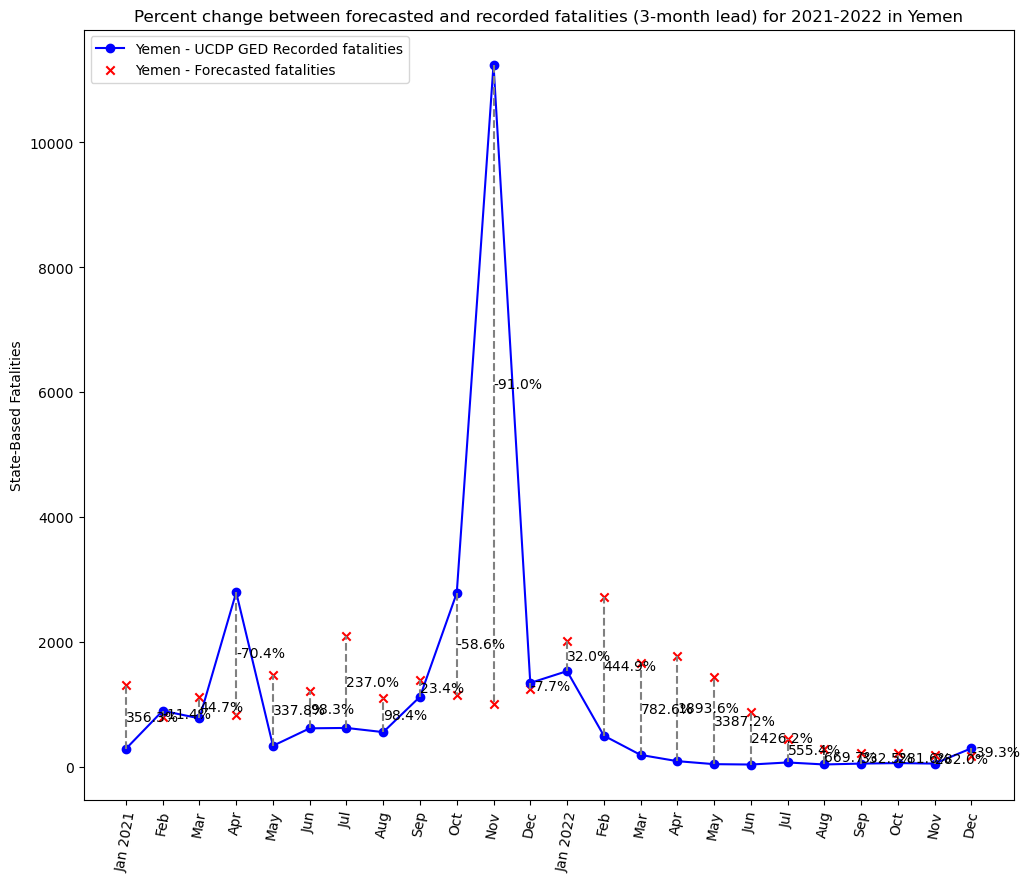

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define countries to plot
countries_to_plot = [(124, 'Yemen')]  # Replace with your desired country ID and name

# Define the range of month_ids you want to include
start_month_id = 493  # 2021-01
end_month_id = 516  # 2022-12
month_ids_to_plot = [month_id for month_id in range(start_month_id, end_month_id + 1)]

# Define ticks for months
month_ticks = ['Jan 2021', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
               'Jan 2022', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ids_ticks = range(start_month_id, end_month_id + 1)

# Plotting loop
for country_id, country_name in countries_to_plot:
    plt.figure(figsize=(12, 10))
    subset = df.loc[(slice(None), country_id), :]
    
    # Filter the data for the specified month range
    subset_filtered = subset[subset.index.get_level_values('month_id').isin(month_ids_to_plot)]
    
    # Plot the actual values as the blue line graph (flipping the roles)
    plt.plot(
        subset_filtered.index.get_level_values('month_id'),
        np.expm1(subset_filtered['ln_ged_sb_dep']),
        label=f'{country_name} - UCDP GED Recorded fatalities',
        marker='o',
        linestyle='-',
        color='blue'
    )
    
    # Adding forecasted values as red "x" markers
    for month_id in month_ids_to_plot:
        column_name = f'sc_{month_id - 3}'
        if column_name in df.columns:
            # Forecasted value (red "x" marker)
            forecasted = np.expm1(subset.loc[month_id, column_name].iloc[0])
            # Actual value (blue line)
            actual = np.expm1(subset_filtered.loc[month_id, 'ln_ged_sb_dep'].iloc[0])
            
            # Scatter the forecasted value (red 'x' markers)
            plt.scatter(month_id, forecasted, marker='x', color='red', label='_nolegend_')
            
            # Connect the dot with a dashed line to the blue line (actual values)
            plt.plot([month_id, month_id], [actual, forecasted], linestyle='--', color='gray')
            
            # Calculate and display the percent change as text next to the dashed line
            percent_change = ((forecasted - actual) / actual) * 100
            plt.text(
                month_id,
                (actual + forecasted) / 2,
                f'{percent_change:.1f}%',  # Format as percentage
                color='black',
                ha='left',
                va='center'
            )

    # Manually add legend entry for the scatter plot label outside the loop
    plt.scatter([], [], marker='x', color='red', label=f'{country_name} - Forecasted fatalities')

    # Customize plot for each country
    plt.title(f'Percent change between forecasted and recorded fatalities (3-month lead) for 2021-2022 in {country_name}')
    plt.xticks(month_ids_ticks, month_ticks, rotation=80)
    plt.ylabel('State-Based Fatalities')
    plt.legend(loc='upper left')
    
    # Save the plot
    plt.savefig(f'{home}/Desktop/{country_name}_percent_change_flipped.png', dpi=300)
    
    # Show the plot for the current country
    plt.show()


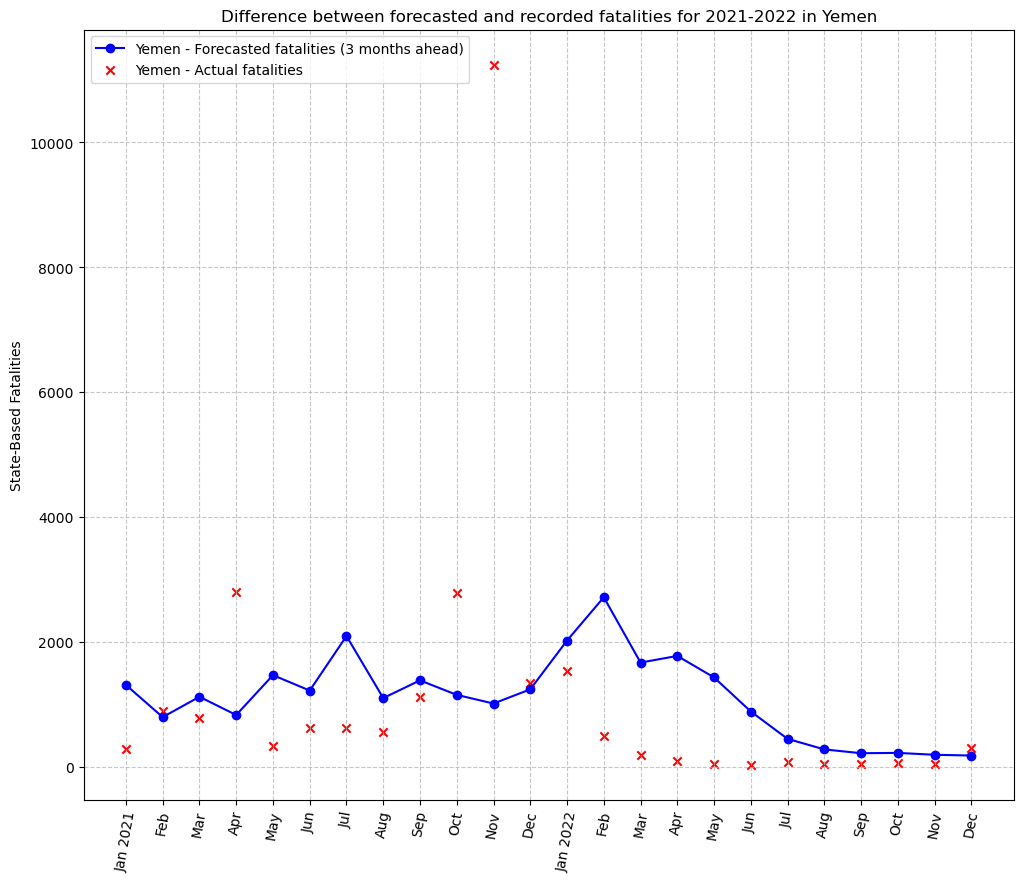

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define countries to plot
countries_to_plot = [(124, 'Yemen')]  # Replace with your desired country ID and name

# Define the range of month_ids you want to include
start_month_id = 493  # 2021-01
end_month_id = 516  # 2022-12
month_ids_to_plot = [month_id for month_id in range(start_month_id, end_month_id + 1)]

# Define ticks for months
month_ticks = ['Jan 2021', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
               'Jan 2022', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ids_ticks = range(start_month_id, end_month_id + 1)

# Plotting loop
for country_id, country_name in countries_to_plot:
    plt.figure(figsize=(12, 10))
    subset = df.loc[(slice(None), country_id), :]
    
    # Filter the data for the specified month range
    subset_filtered = subset[subset.index.get_level_values('month_id').isin(month_ids_to_plot)]
    
    # Plot the forecasted fatalities as the blue line graph
    forecasted_fatalities = []
    for month_id in month_ids_to_plot:
        column_name = f'sc_{month_id - 3}'
        if column_name in df.columns:
            forecasted_fatalities.append(np.expm1(subset.loc[month_id, column_name].iloc[0]))
        else:
            forecasted_fatalities.append(None)  # Handle missing forecast data gracefully
    plt.plot(
        month_ids_to_plot, forecasted_fatalities,
        label=f'{country_name} - Forecasted fatalities (3 months ahead)', marker='o', linestyle='-', color='blue'
    )
    
    # Plot the actual fatalities as red markers
    actual_fatalities = np.expm1(subset_filtered['ln_ged_sb_dep'])
    plt.scatter(
        subset_filtered.index.get_level_values('month_id'),
        actual_fatalities,
        color='red', label=f'{country_name} - Actual fatalities', marker='x'
    )
    
    # Customize plot for each country
    plt.title(f'Difference between forecasted and recorded fatalities for 2021-2022 in {country_name}')
    plt.xticks(month_ids_ticks, month_ticks, rotation=80)
    plt.ylabel('State-Based Fatalities')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Save the plot
    plt.savefig(f'/Users/alm/Desktop/{country_name}_forecast_vs_actual.png', dpi=300)
    
    # Show the plot for the current country
    plt.show()


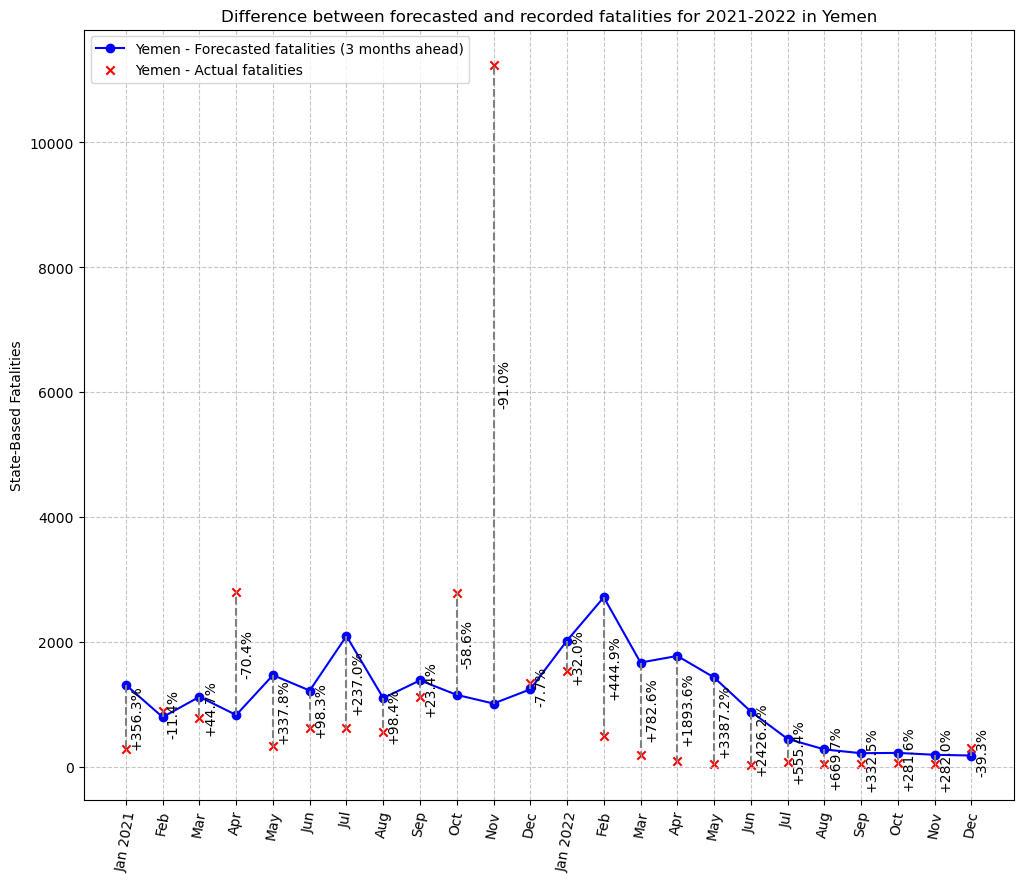

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define countries to plot
countries_to_plot = [(124, 'Yemen')]  # Replace with your desired country ID and name

# Define the range of month_ids you want to include
start_month_id = 493  # 2021-01
end_month_id = 516  # 2022-12
month_ids_to_plot = [month_id for month_id in range(start_month_id, end_month_id + 1)]

# Define ticks for months
month_ticks = ['Jan 2021', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
               'Jan 2022', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ids_ticks = range(start_month_id, end_month_id + 1)

# Plotting loop
for country_id, country_name in countries_to_plot:
    plt.figure(figsize=(12, 10))
    subset = df.loc[(slice(None), country_id), :]
    
    # Filter the data for the specified month range
    subset_filtered = subset[subset.index.get_level_values('month_id').isin(month_ids_to_plot)]
    
    # Plot the forecasted fatalities as the blue line graph
    forecasted_fatalities = []
    for month_id in month_ids_to_plot:
        column_name = f'sc_{month_id - 3}'
        if column_name in df.columns:
            forecasted_fatalities.append(np.expm1(subset.loc[month_id, column_name].iloc[0]))
        else:
            forecasted_fatalities.append(None)  # Handle missing forecast data gracefully
    plt.plot(
        month_ids_to_plot, forecasted_fatalities,
        label=f'{country_name} - Forecasted fatalities (3 months ahead)', marker='o', linestyle='-', color='blue'
    )
    
    # Plot the actual fatalities as red markers
    actual_fatalities = np.expm1(subset_filtered['ln_ged_sb_dep'])
    plt.scatter(
        subset_filtered.index.get_level_values('month_id'),
        actual_fatalities,
        color='red', label=f'{country_name} - Actual fatalities', marker='x'
    )
    
    # Add dashed lines between forecasted and actual values, along with percent change text
    for i, month_id in enumerate(month_ids_to_plot):
        if forecasted_fatalities[i] is not None:
            forecasted = forecasted_fatalities[i]
            actual = actual_fatalities[subset_filtered.index.get_level_values('month_id') == month_id].iloc[0] if month_id in subset_filtered.index.get_level_values('month_id').values else None

            if actual is not None:
                # Plot the dashed line between forecasted and actual values
                plt.plot([month_id, month_id], [forecasted, actual], linestyle='--', color='gray')

                # Calculate the percent change (Forecasted - Actual) / Actual * 100
                if actual != 0:
                    percent_change = ((forecasted - actual) / actual) * 100
                else:
                    percent_change = 0  # Avoid division by zero, if actual is zero

                # Add spacing on the x-axis by slightly offsetting the x-position
                offset = 0.1  # Adjust this value to control the spacing on the x-axis
                text_x_position = month_id + offset  # Shift the x-position slightly to the right

                # Display the percent change as text with a 90-degree rotation
                plt.text(
                    text_x_position, (forecasted + actual) / 2, f'{percent_change:+.1f}%', 
                    color='black', ha='left', va='center', rotation=90
                )

    # Customize plot for each country
    plt.title(f'Difference between forecasted and recorded fatalities for 2021-2022 in {country_name}')
    plt.xticks(month_ids_ticks, month_ticks, rotation=80)
    plt.ylabel('State-Based Fatalities')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Save the plot
    plt.savefig(f'/Users/alm/Desktop/{country_name}_forecast_vs_actual_percent_change.png', dpi=300)
    
    # Show the plot for the current country
    plt.show()


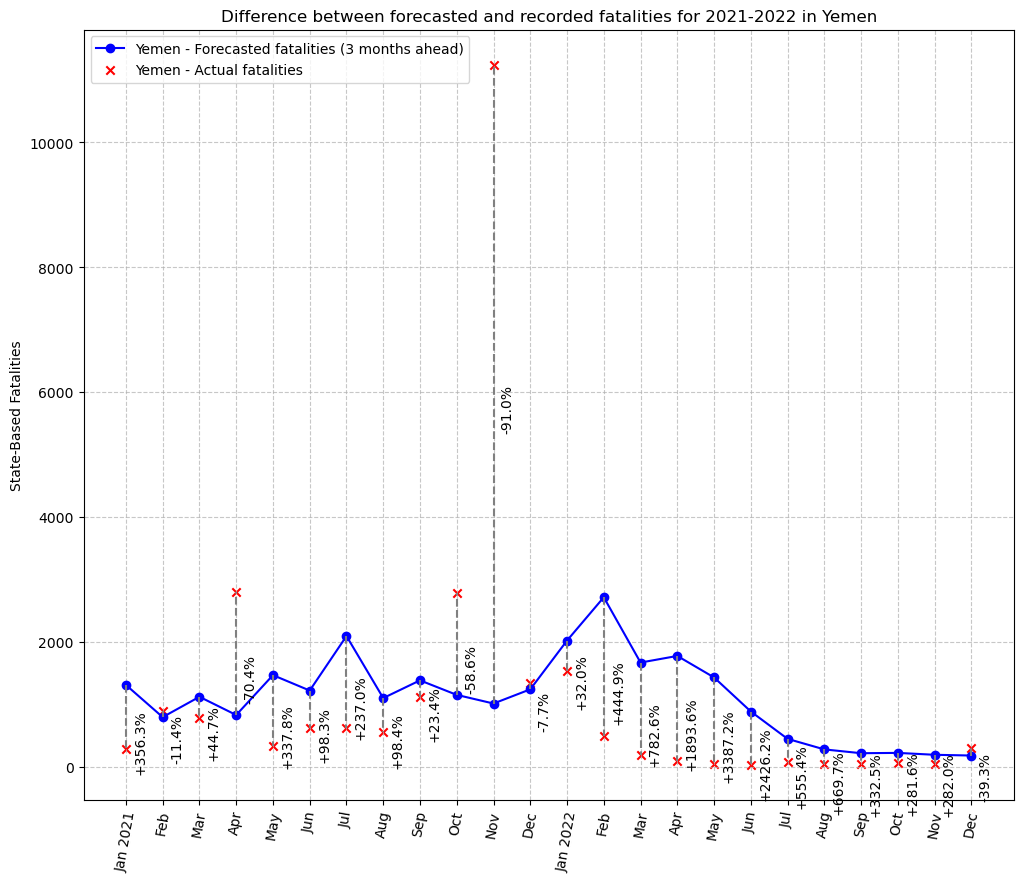

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Define countries to plot
countries_to_plot = [(124, 'Yemen')]  # Replace with your desired country ID and name

# Define the range of month_ids you want to include
start_month_id = 493  # 2021-01
end_month_id = 516  # 2022-12
month_ids_to_plot = [month_id for month_id in range(start_month_id, end_month_id + 1)]

# Define ticks for months
month_ticks = ['Jan 2021', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
               'Jan 2022', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ids_ticks = range(start_month_id, end_month_id + 1)

# Plotting loop
for country_id, country_name in countries_to_plot:
    plt.figure(figsize=(12, 10))
    subset = df.loc[(slice(None), country_id), :]
    
    # Filter the data for the specified month range
    subset_filtered = subset[subset.index.get_level_values('month_id').isin(month_ids_to_plot)]
    
    # Plot the forecasted fatalities as the blue line graph
    forecasted_fatalities = []
    for month_id in month_ids_to_plot:
        column_name = f'sc_{month_id - 3}'
        if column_name in df.columns:
            forecasted_fatalities.append(np.expm1(subset.loc[month_id, column_name].iloc[0]))
        else:
            forecasted_fatalities.append(None)  # Handle missing forecast data gracefully
    plt.plot(
        month_ids_to_plot, forecasted_fatalities,
        label=f'{country_name} - Forecasted fatalities (3 months ahead)', marker='o', linestyle='-', color='blue'
    )
    
    # Plot the actual fatalities as red markers
    actual_fatalities = np.expm1(subset_filtered['ln_ged_sb_dep'])
    plt.scatter(
        subset_filtered.index.get_level_values('month_id'),
        actual_fatalities,
        color='red', label=f'{country_name} - Actual fatalities', marker='x'
    )
    
    # Add dashed lines between forecasted and actual values, along with percent change text
    for i, month_id in enumerate(month_ids_to_plot):
        if forecasted_fatalities[i] is not None:
            forecasted = forecasted_fatalities[i]
            actual = actual_fatalities[subset_filtered.index.get_level_values('month_id') == month_id].iloc[0] if month_id in subset_filtered.index.get_level_values('month_id').values else None

            if actual is not None:
                # Plot the dashed line between forecasted and actual values
                plt.plot([month_id, month_id], [forecasted, actual], linestyle='--', color='gray')

                # Calculate the percent change (Forecasted - Actual) / Actual * 100
                if actual != 0:
                    percent_change = ((forecasted - actual) / actual) * 100
                else:
                    percent_change = 0  # Avoid division by zero, if actual is zero

                # Add spacing on the x-axis by slightly offsetting the x-position
                offset_x = 0.2  # Adjust this value to control the spacing on the x-axis
                text_x_position = month_id + offset_x  # Shift the x-position slightly to the right

                # Add spacing on the y-axis by slightly offsetting the y-position
                offset_y = -400  # Adjust this value to control the vertical spacing of the text
                text_y_position = (forecasted + actual) / 2 + offset_y  # Shift the text vertically

                # Display the percent change as text with a 90-degree rotation
                plt.text(
                    text_x_position, text_y_position, f'{percent_change:+.1f}%', 
                    color='black', ha='left', va='center', rotation=90
                )

    # Customize plot for each country
    plt.title(f'Difference between forecasted and recorded fatalities for 2021-2022 in {country_name}')
    plt.xticks(month_ids_ticks, month_ticks, rotation=80)
    plt.ylabel('State-Based Fatalities')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Save the plot
    plt.savefig(f'/Users/alm/Desktop/{country_name}_forecast_vs_actual_percent_change.png', dpi=300)
    
    # Show the plot for the current country
    plt.show()


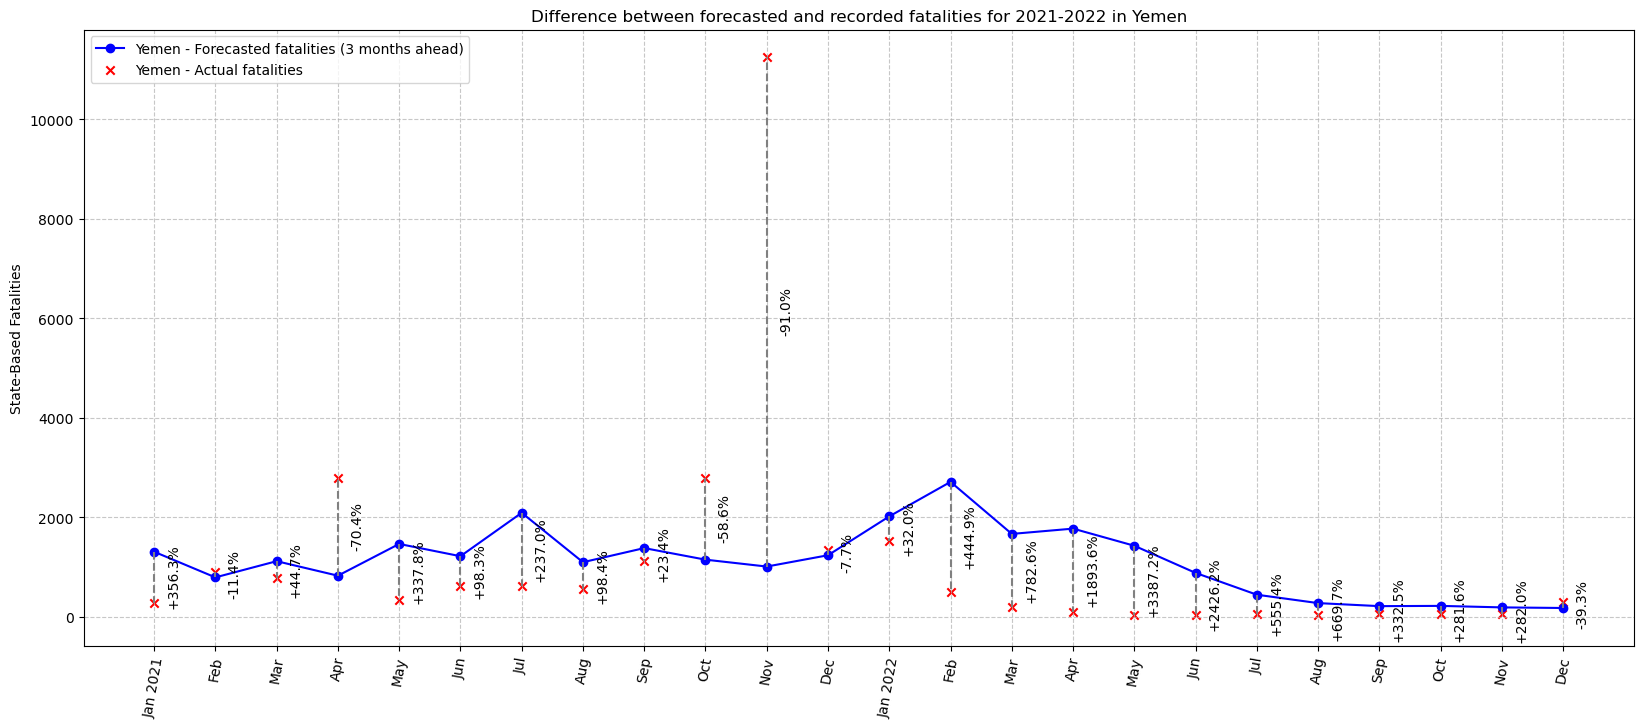

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define countries to plot
countries_to_plot = [(124, 'Yemen')]  # Replace with your desired country ID and name

# Define the range of month_ids you want to include
start_month_id = 493  # 2021-01
end_month_id = 516  # 2022-12
month_ids_to_plot = [month_id for month_id in range(start_month_id, end_month_id + 1)]

# Define ticks for months
month_ticks = ['Jan 2021', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
               'Jan 2022', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ids_ticks = range(start_month_id, end_month_id + 1)

# Plotting loop
for country_id, country_name in countries_to_plot:
    plt.figure(figsize=(20, 8))
    subset = df.loc[(slice(None), country_id), :]
    
    # Filter the data for the specified month range
    subset_filtered = subset[subset.index.get_level_values('month_id').isin(month_ids_to_plot)]
    
    # Plot the forecasted fatalities as the blue line graph
    forecasted_fatalities = []
    for month_id in month_ids_to_plot:
        column_name = f'sc_{month_id - 3}'
        if column_name in df.columns:
            forecasted_fatalities.append(np.expm1(subset.loc[month_id, column_name].iloc[0]))
        else:
            forecasted_fatalities.append(None)  # Handle missing forecast data gracefully
    plt.plot(
        month_ids_to_plot, forecasted_fatalities,
        label=f'{country_name} - Forecasted fatalities (3 months ahead)', marker='o', linestyle='-', color='blue'
    )
    
    # Plot the actual fatalities as red markers
    actual_fatalities = np.expm1(subset_filtered['ln_ged_sb_dep'])
    plt.scatter(
        subset_filtered.index.get_level_values('month_id'),
        actual_fatalities,
        color='red', label=f'{country_name} - Actual fatalities', marker='x'
    )
    
    # Add dashed lines between forecasted and actual values, along with percent change text
    for i, month_id in enumerate(month_ids_to_plot):
        if forecasted_fatalities[i] is not None:
            forecasted = forecasted_fatalities[i]
            actual = actual_fatalities[subset_filtered.index.get_level_values('month_id') == month_id].iloc[0] if month_id in subset_filtered.index.get_level_values('month_id').values else None

            if actual is not None:
                # Plot the dashed line between forecasted and actual values
                plt.plot([month_id, month_id], [forecasted, actual], linestyle='--', color='gray')

                # Calculate the percent change (Forecasted - Actual) / Actual * 100
                if actual != 0:
                    percent_change = ((forecasted - actual) / actual) * 100
                else:
                    percent_change = 0  # Avoid division by zero, if actual is zero

                # Add spacing on the x-axis by slightly offsetting the x-position
                offset_x = 0.2  # Adjust this value to control the spacing on the x-axis
                text_x_position = month_id + offset_x  # Shift the x-position slightly to the right

                # Add spacing on the y-axis by slightly offsetting the y-position
                offset_y = 20  # Adjust this value to control the vertical spacing of the text
                text_y_position = (forecasted + actual) / 2 + offset_y  # Shift the text vertically

                # Display the percent change as text with a 90-degree rotation
                plt.text(
                    text_x_position, text_y_position, f'{percent_change:+.1f}%', 
                    color='black', ha='left', va='center', rotation=90
                )

    # Customize plot for each country
    plt.title(f'Difference between forecasted and recorded fatalities for 2021-2022 in {country_name}')
    plt.xticks(month_ids_ticks, month_ticks, rotation=80)
    plt.ylabel('State-Based Fatalities')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add padding below the zero on the y-axis
    y_min, y_max = plt.ylim()  # Get current y-axis limits
    plt.ylim(y_min - 50, y_max)  # Add padding below zero by adjusting the lower y-limit

    # Save the plot
    plt.savefig(f'/Users/alm/Desktop/{country_name}_forecast_vs_actual_percent_change.png', dpi=300)
    
    # Show the plot for the current country
    plt.show()


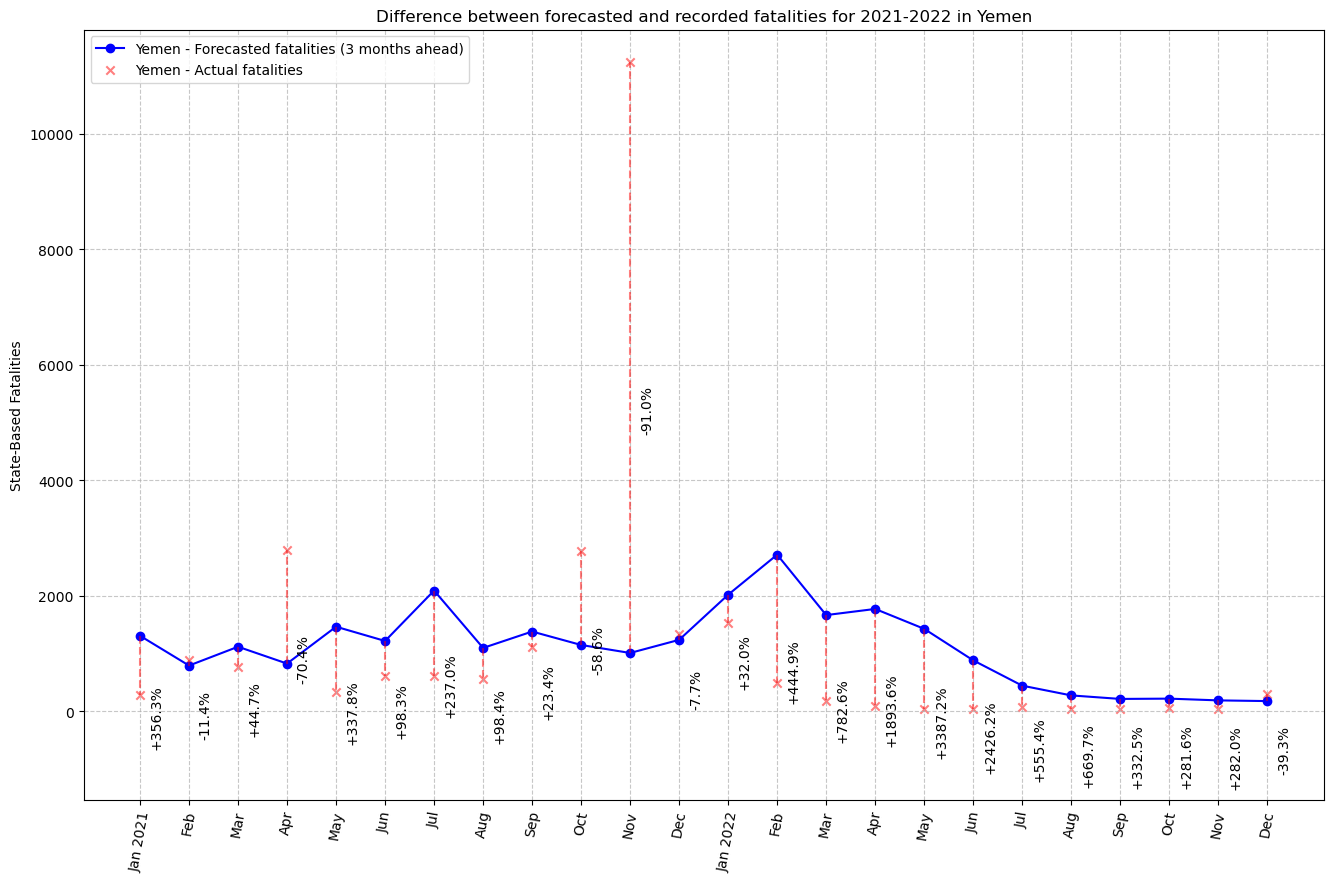

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Define countries to plot
countries_to_plot = [(124, 'Yemen')]  # Replace with your desired country ID and name

# Define the range of month_ids you want to include
start_month_id = 493  # 2021-01
end_month_id = 516  # 2022-12
month_ids_to_plot = [month_id for month_id in range(start_month_id, end_month_id + 1)]

# Define ticks for months
month_ticks = ['Jan 2021', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
               'Jan 2022', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ids_ticks = range(start_month_id, end_month_id + 1)

# Plotting loop
for country_id, country_name in countries_to_plot:
    plt.figure(figsize=(16, 10))
    subset = df.loc[(slice(None), country_id), :]
    
    # Filter the data for the specified month range
    subset_filtered = subset[subset.index.get_level_values('month_id').isin(month_ids_to_plot)]
    
    # Plot the forecasted fatalities as the blue line graph
    forecasted_fatalities = []
    for month_id in month_ids_to_plot:
        column_name = f'sc_{month_id - 3}'
        if column_name in df.columns:
            forecasted_fatalities.append(np.expm1(subset.loc[month_id, column_name].iloc[0]))
        else:
            forecasted_fatalities.append(None)  # Handle missing forecast data gracefully
    plt.plot(
        month_ids_to_plot, forecasted_fatalities,
        label=f'{country_name} - Forecasted fatalities (3 months ahead)', marker='o', linestyle='-', color='blue'
    )
    
    # Plot the actual fatalities as red markers
    actual_fatalities = np.expm1(subset_filtered['ln_ged_sb_dep'])
    plt.scatter(
        subset_filtered.index.get_level_values('month_id'),
        actual_fatalities,
        color='red', label=f'{country_name} - Actual fatalities', marker='x', alpha=0.5
    )
    
    # Add dashed lines between forecasted and actual values, along with percent change text
    for i, month_id in enumerate(month_ids_to_plot):
        if forecasted_fatalities[i] is not None:
            forecasted = forecasted_fatalities[i]
            actual = actual_fatalities[subset_filtered.index.get_level_values('month_id') == month_id].iloc[0] if month_id in subset_filtered.index.get_level_values('month_id').values else None

            if actual is not None:
                # Plot the dashed line between forecasted and actual values
                plt.plot([month_id, month_id], [forecasted, actual], linestyle='--', color='red', alpha=0.5)

                # Calculate the percent change (Forecasted - Actual) / Actual * 100
                if actual != 0:
                    percent_change = ((forecasted - actual) / actual) * 100
                else:
                    percent_change = 0  # Avoid division by zero, if actual is zero

                # Add spacing on the x-axis by slightly offsetting the x-position
                offset_x = 0.2  # Adjust this value to control the spacing on the x-axis
                text_x_position = month_id + offset_x  # Shift the x-position slightly to the right

                # Add spacing on the y-axis by slightly offsetting the y-position
                offset_y = -900  # Adjust this value to control the vertical spacing of the text
                text_y_position = (forecasted + actual) / 2 + offset_y  # Shift the text vertically

                # Display the percent change as text with a 90-degree rotation
                plt.text(
                    text_x_position, text_y_position, f'{percent_change:+.1f}%', 
                    color='black', ha='left', va='center', rotation=90
                )
    
    # Connect the red x-markers (actual values) with a dashed line
    for i in range(len(month_ids_to_plot) - 1):
        month_id_1 = month_ids_to_plot[i]
        month_id_2 = month_ids_to_plot[i + 1]
        
        # Ensure both month_id_1 and month_id_2 exist in the filtered subset
        if month_id_1 in subset_filtered.index.get_level_values('month_id') and month_id_2 in subset_filtered.index.get_level_values('month_id'):
            actual_1 = actual_fatalities[subset_filtered.index.get_level_values('month_id') == month_id_1].iloc[0]
            actual_2 = actual_fatalities[subset_filtered.index.get_level_values('month_id') == month_id_2].iloc[0]

            # Plot the dashed line connecting consecutive x-markers (red 'x')
         #   plt.plot([month_id_1, month_id_2], [actual_1, actual_2], linestyle='-', color='black', alpha=0.5)

    # Customize plot for each country
    plt.title(f'Difference between forecasted and recorded fatalities for 2021-2022 in {country_name}')
    plt.xticks(month_ids_ticks, month_ticks, rotation=80)
    plt.ylabel('State-Based Fatalities')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add padding below the zero on the y-axis
    y_min, y_max = plt.ylim()  # Get current y-axis limits
    plt.ylim(y_min - 1000, y_max)  # Add padding below zero by adjusting the lower y-limit

    # Save the plot
    plt.savefig(f'/Users/alm/Desktop/{country_name}_forecast_vs_actual_percent_change.png', dpi=300)
    
    # Show the plot for the current country
    plt.show()


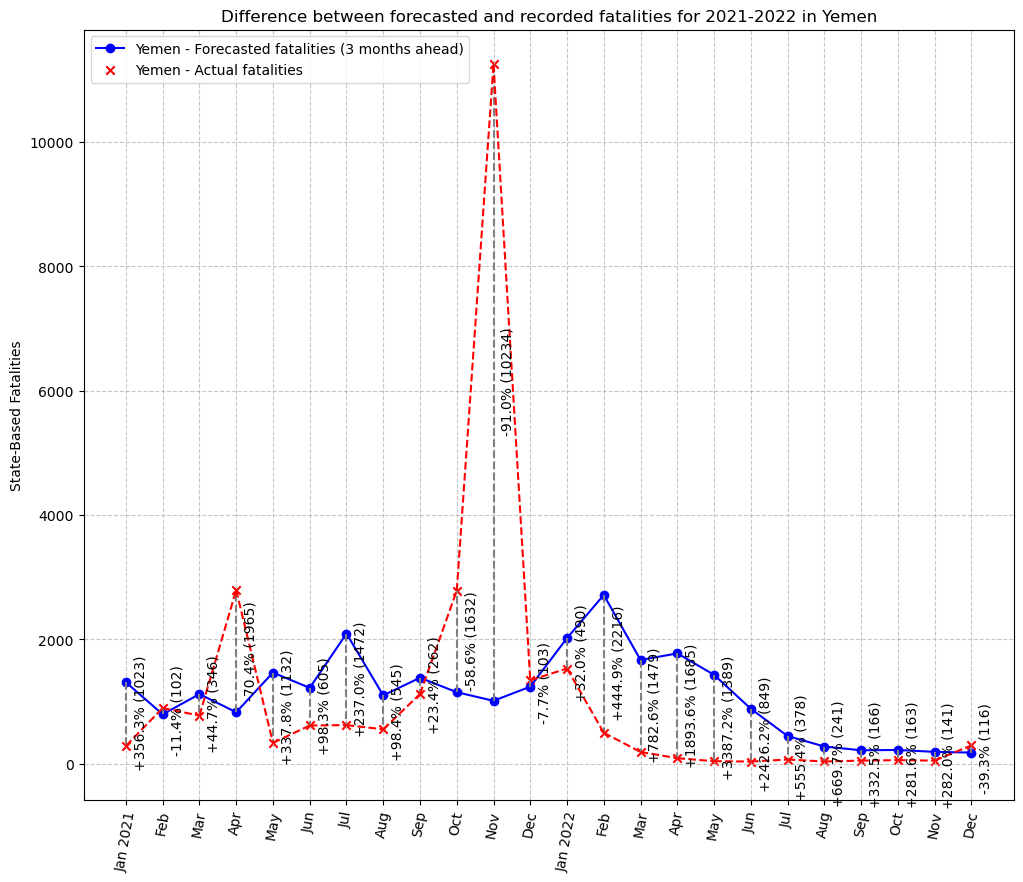

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Define countries to plot
countries_to_plot = [(124, 'Yemen')]  # Replace with your desired country ID and name

# Define the range of month_ids you want to include
start_month_id = 493  # 2021-01
end_month_id = 516  # 2022-12
month_ids_to_plot = [month_id for month_id in range(start_month_id, end_month_id + 1)]

# Define ticks for months
month_ticks = ['Jan 2021', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
               'Jan 2022', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ids_ticks = range(start_month_id, end_month_id + 1)

# Plotting loop
for country_id, country_name in countries_to_plot:
    plt.figure(figsize=(12, 10))
    subset = df.loc[(slice(None), country_id), :]
    
    # Filter the data for the specified month range
    subset_filtered = subset[subset.index.get_level_values('month_id').isin(month_ids_to_plot)]
    
    # Plot the forecasted fatalities as the blue line graph
    forecasted_fatalities = []
    for month_id in month_ids_to_plot:
        column_name = f'sc_{month_id - 3}'
        if column_name in df.columns:
            forecasted_fatalities.append(np.expm1(subset.loc[month_id, column_name].iloc[0]))
        else:
            forecasted_fatalities.append(None)  # Handle missing forecast data gracefully
    plt.plot(
        month_ids_to_plot, forecasted_fatalities,
        label=f'{country_name} - Forecasted fatalities (3 months ahead)', marker='o', linestyle='-', color='blue'
    )
    
    # Plot the actual fatalities as red markers
    actual_fatalities = np.expm1(subset_filtered['ln_ged_sb_dep'])
    plt.scatter(
        subset_filtered.index.get_level_values('month_id'),
        actual_fatalities,
        color='red', label=f'{country_name} - Actual fatalities', marker='x'
    )
    
    # Add dashed lines between forecasted and actual values, along with percent change text
    for i, month_id in enumerate(month_ids_to_plot):
        if forecasted_fatalities[i] is not None:
            forecasted = forecasted_fatalities[i]
            actual = actual_fatalities[subset_filtered.index.get_level_values('month_id') == month_id].iloc[0] if month_id in subset_filtered.index.get_level_values('month_id').values else None

            if actual is not None:
                # Plot the dashed line between forecasted and actual values
                plt.plot([month_id, month_id], [forecasted, actual], linestyle='--', color='gray')

                # Calculate the percent change (Forecasted - Actual) / Actual * 100
                if actual != 0:
                    percent_change = ((forecasted - actual) / actual) * 100
                else:
                    percent_change = 0  # Avoid division by zero, if actual is zero

                # Calculate the absolute difference
                absolute_difference = abs(forecasted - actual)
                
                # Add spacing on the x-axis by slightly offsetting the x-position
                offset_x = 0.2  # Adjust this value to control the spacing on the x-axis
                text_x_position = month_id + offset_x  # Shift the x-position slightly to the right

                # Add spacing on the y-axis by slightly offsetting the y-position
                offset_y = 20  # Adjust this value to control the vertical spacing of the text
                text_y_position = (forecasted + actual) / 2 + offset_y  # Shift the text vertically

                # Display the percent change and absolute difference as text with a 90-degree rotation
                plt.text(
                    text_x_position, text_y_position, 
                    f'{percent_change:+.1f}% ({absolute_difference:.0f})', 
                    color='black', ha='left', va='center', rotation=90
                )
    
    # Connect the red x-markers (actual values) with a dashed line
    for i in range(len(month_ids_to_plot) - 1):
        month_id_1 = month_ids_to_plot[i]
        month_id_2 = month_ids_to_plot[i + 1]
        
        # Ensure both month_id_1 and month_id_2 exist in the filtered subset
        if month_id_1 in subset_filtered.index.get_level_values('month_id') and month_id_2 in subset_filtered.index.get_level_values('month_id'):
            actual_1 = actual_fatalities[subset_filtered.index.get_level_values('month_id') == month_id_1].iloc[0]
            actual_2 = actual_fatalities[subset_filtered.index.get_level_values('month_id') == month_id_2].iloc[0]

            # Plot the dashed line connecting consecutive x-markers (red 'x')
            plt.plot([month_id_1, month_id_2], [actual_1, actual_2], linestyle='--', color='red')

    # Customize plot for each country
    plt.title(f'Difference between forecasted and recorded fatalities for 2021-2022 in {country_name}')
    plt.xticks(month_ids_ticks, month_ticks, rotation=80)
    plt.ylabel('State-Based Fatalities')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add padding below the zero on the y-axis
    y_min, y_max = plt.ylim()  # Get current y-axis limits
    plt.ylim(y_min - 50, y_max)  # Add padding below zero by adjusting the lower y-limit

    # Save the plot
    plt.savefig(f'/Users/alm/Desktop/{country_name}_forecast_vs_actual_percent_change.png', dpi=300)
    
    # Show the plot for the current country
    plt.show()


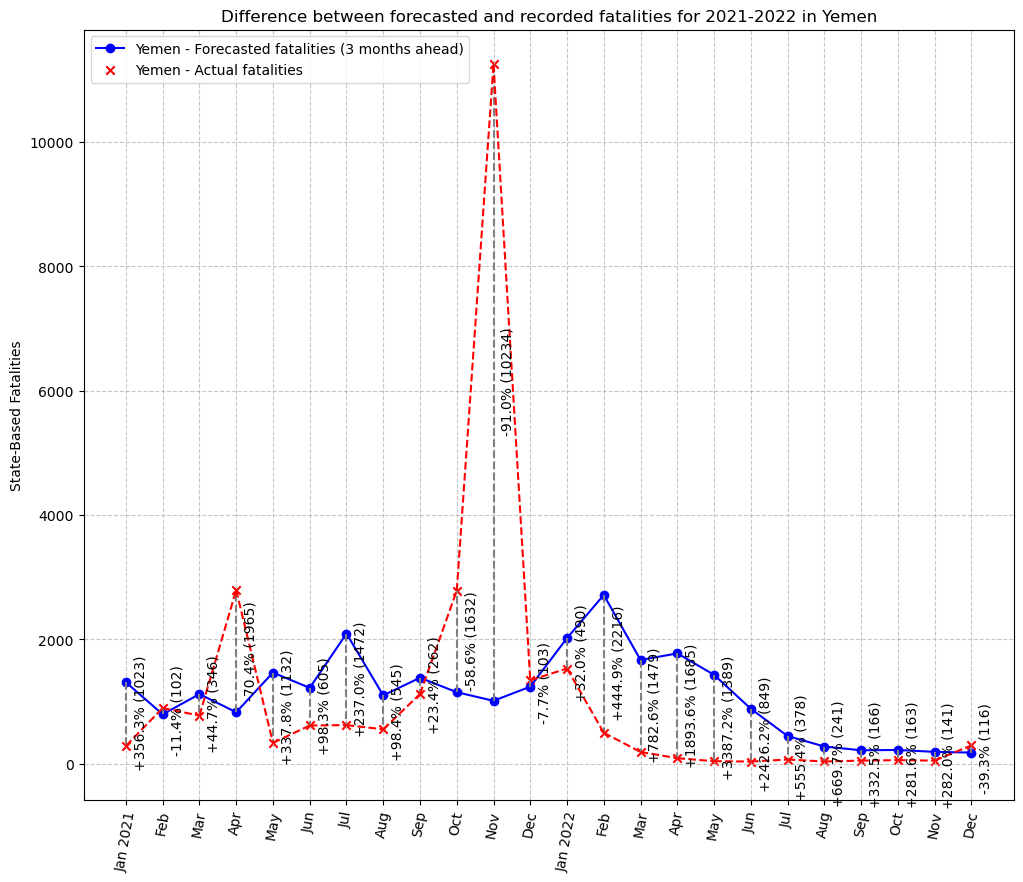

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Define countries to plot
countries_to_plot = [(124, 'Yemen')]  # Replace with your desired country ID and name

# Define the range of month_ids you want to include
start_month_id = 493  # 2021-01
end_month_id = 516  # 2022-12
month_ids_to_plot = [month_id for month_id in range(start_month_id, end_month_id + 1)]

# Define ticks for months
month_ticks = ['Jan 2021', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
               'Jan 2022', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ids_ticks = range(start_month_id, end_month_id + 1)

# Plotting loop
for country_id, country_name in countries_to_plot:
    plt.figure(figsize=(12, 10))
    subset = df.loc[(slice(None), country_id), :]
    
    # Filter the data for the specified month range
    subset_filtered = subset[subset.index.get_level_values('month_id').isin(month_ids_to_plot)]
    
    # Plot the forecasted fatalities as the blue line graph
    forecasted_fatalities = []
    for month_id in month_ids_to_plot:
        column_name = f'sc_{month_id - 3}'
        if column_name in df.columns:
            forecasted_fatalities.append(np.expm1(subset.loc[month_id, column_name].iloc[0]))
        else:
            forecasted_fatalities.append(None)  # Handle missing forecast data gracefully
    plt.plot(
        month_ids_to_plot, forecasted_fatalities,
        label=f'{country_name} - Forecasted fatalities (3 months ahead)', marker='o', linestyle='-', color='blue'
    )
    
    # Plot the actual fatalities as red markers
    actual_fatalities = np.expm1(subset_filtered['ln_ged_sb_dep'])
    plt.scatter(
        subset_filtered.index.get_level_values('month_id'),
        actual_fatalities,
        color='red', label=f'{country_name} - Actual fatalities', marker='x'
    )
    
    # Add dashed lines between forecasted and actual values, along with percent change text
    for i, month_id in enumerate(month_ids_to_plot):
        if forecasted_fatalities[i] is not None:
            forecasted = forecasted_fatalities[i]
            actual = actual_fatalities[subset_filtered.index.get_level_values('month_id') == month_id].iloc[0] if month_id in subset_filtered.index.get_level_values('month_id').values else None

            if actual is not None:
                # Plot the dashed line between forecasted and actual values
                plt.plot([month_id, month_id], [forecasted, actual], linestyle='--', color='gray')

                # Calculate the percent change (Forecasted - Actual) / Actual * 100
                if actual != 0:
                    percent_change = ((forecasted - actual) / actual) * 100
                else:
                    percent_change = 0  # Avoid division by zero, if actual is zero

                # Calculate the absolute difference
                absolute_difference = abs(forecasted - actual)
                
                # Add spacing on the x-axis by slightly offsetting the x-position
                offset_x = 0.2  # Adjust this value to control the spacing on the x-axis
                text_x_position = month_id + offset_x  # Shift the x-position slightly to the right

                # Add spacing on the y-axis by slightly offsetting the y-position
                offset_y = 20  # Adjust this value to control the vertical spacing of the text
                text_y_position = (forecasted + actual) / 2 + offset_y  # Shift the text vertically

                # Display the percent change and absolute difference as text with a 90-degree rotation
                plt.text(
                    text_x_position, text_y_position, 
                    f'{percent_change:+.1f}% ({absolute_difference:.0f})', 
                    color='black', ha='left', va='center', rotation=90
                )
    
    # Connect the red x-markers (actual values) with a dashed line
    for i in range(len(month_ids_to_plot) - 1):
        month_id_1 = month_ids_to_plot[i]
        month_id_2 = month_ids_to_plot[i + 1]
        
        # Ensure both month_id_1 and month_id_2 exist in the filtered subset
        if month_id_1 in subset_filtered.index.get_level_values('month_id') and month_id_2 in subset_filtered.index.get_level_values('month_id'):
            actual_1 = actual_fatalities[subset_filtered.index.get_level_values('month_id') == month_id_1].iloc[0]
            actual_2 = actual_fatalities[subset_filtered.index.get_level_values('month_id') == month_id_2].iloc[0]

            # Plot the dashed line connecting consecutive x-markers (red 'x')
            plt.plot([month_id_1, month_id_2], [actual_1, actual_2], linestyle='--', color='red')

    # Customize plot for each country
    plt.title(f'Difference between forecasted and recorded fatalities for 2021-2022 in {country_name}')
    plt.xticks(month_ids_ticks, month_ticks, rotation=80)
    plt.ylabel('State-Based Fatalities')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add padding below the zero on the y-axis
    y_min, y_max = plt.ylim()  # Get current y-axis limits
    plt.ylim(y_min - 50, y_max)  # Add padding below zero by adjusting the lower y-limit

    # Save the plot
    plt.savefig(f'/Users/alm/Desktop/{country_name}_forecast_vs_actual_percent_change.png', dpi=300)
    
    # Show the plot for the current country
    plt.show()


In [91]:
for EndOfHistory in range(519, 538):

    #which model do you want to be graphed within this notebook (accepts one model only)
    #if you want a different model, rerun this entire notebook again with that new name
    #note that this will produce a separate folder, so should not be an issue
    model_wanted = 'genetic_ensemble'
    model_wanted_pgm = 'ensemble_cm_calib'

    #current month run description
    dev_id = 'fatalities002'
    run_id = dev_id
    model_attempt = 't01'

    #prediction_cont_name_default = {'step_combined':'ln1_step_combined_sb'}
    #prediction_dich_name_default = {'step_combined':'step_combined_sb'}

    predstore_future =  'cm_' + model_wanted + '_f' + str(EndOfHistory)
    predstore_future_dich = 'cm_' + model_wanted + '_dich_f' + str(EndOfHistory)

    predictions_df = pd.DataFrame.forecasts.read_store(predstore_future, run=dev_id)
    predictions_df = predictions_df.reset_index()
    predictions_df['step'] = predictions_df['month_id'] - EndOfHistory
    predictions_df = predictions_df.set_index(['step', 'country_id'], drop = True)

    # Dynamically rename the DataFrame based on EndOfHistory
    globals()[f'predictions_df_{EndOfHistory}'] = predictions_df

    #predictions_df.rename(columns = prediction_cont_name_default, inplace = True)
    #predictions_df[i['new_name']]=np.log1p(predictions_df[i['old_name']])
    #
    #predictions_dich_df = pd.DataFrame.forecasts.read_store(predstore_future_dich, run=dev_id)
    #predictions_dich_df = predictions_dich_df.reset_index()
    #predictions_dich_df['step'] = predictions_dich_df['month_id'] - EndOfHistory
    #predictions_dich_df = predictions_dich_df.set_index(['step', 'country_id'], drop = True)
    #predictions_dich_df.rename(columns = prediction_dich_name_default, inplace = True)

pr_46_cm_genetic_ensemble_f519.parquet
pr_46_cm_genetic_ensemble_f520.parquet
pr_46_cm_genetic_ensemble_f521.parquet
pr_46_cm_genetic_ensemble_f522.parquet
pr_46_cm_genetic_ensemble_f523.parquet
pr_46_cm_genetic_ensemble_f524.parquet
pr_46_cm_genetic_ensemble_f525.parquet
pr_46_cm_genetic_ensemble_f526.parquet
pr_46_cm_genetic_ensemble_f527.parquet
pr_46_cm_genetic_ensemble_f528.parquet
pr_46_cm_genetic_ensemble_f529.parquet
pr_46_cm_genetic_ensemble_f530.parquet
pr_46_cm_genetic_ensemble_f531.parquet
pr_46_cm_genetic_ensemble_f532.parquet
pr_46_cm_genetic_ensemble_f533.parquet
pr_46_cm_genetic_ensemble_f534.parquet
pr_46_cm_genetic_ensemble_f535.parquet
pr_46_cm_genetic_ensemble_f536.parquet
pr_46_cm_genetic_ensemble_f537.parquet


In [90]:
predictions_df_519

feature          month_id  step_combined
step country_id                         
1    1                520       0.005795
     2                520       0.008796
     3                520       0.010994
     4                520       0.220973
     5                520       0.011109
...                   ...            ...
36   242              555       0.677749
     243              555       0.800938
     244              555       0.748931
     245              555       2.008700
     246              555       1.547860

[6876 rows x 2 columns]

In [ ]:
countries_to_plot = [(124,'Yemen')]  # Replace 'Country1' and 'Country2' with actual country names

# Define the range of month_ids you want to include
start_month_id = 519 # 2021-01
end_month_id = 538 # 2022-12
month_ids_to_plot = [month_id for month_id in range(start_month_id, end_month_id + 1)]

month_ticks = ['Mar 2023', 'Apr 2023', 'May 2023', 'Jun 2023', 'Jul 2023', 'Aug 2023', 'Sept 2023', 'Oct 2023', 'Nov 2023', 'Dec 2023', 'Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024', 'May 2024', 'Jun 2024', 'Jul 2024', 'Aug 2024', 'Sept 2024', 'Oct 2024']
month_ids_ticks = range(start_month_id, end_month_id + 1)

# Plotting loop
#plt.figure(figsize=(12, 10))
for country_id, country_name in countries_to_plot:
    plt.figure(figsize=(12, 10))
    subset = df.loc[(slice(None), country_id), :]
    
    # Filter the data for the specified month range
    subset_filtered = subset[subset.index.get_level_values('month_id').isin(month_ids_to_plot)]
    
    # Un-log ln_ged_sb_dep values and plot as a line graph
    plt.plot(subset_filtered.index.get_level_values('month_id'), np.expm1(subset_filtered['ln_ged_sb_dep']), label=f'{country_name} - UCDP GED Reported fatalities', marker='o', linestyle='-')
    
    # Adding dots for additional columns within the defined month range
    for month_id in month_ids_to_plot:
        column_name = f'sc_{month_id - 3}'
        # Check if the column exists before attempting to access it
        if column_name in df.columns:
            value = np.expm1(subset.loc[month_id, column_name].iloc[0])  # Un-log the value
            plt.scatter(month_id, value, marker='x', color='red', label='_nolegend_')  # Set the color to red and use '_nolegend_' to exclude from legend
            # Connect the dot with a dashed line to the line graph
            plt.plot([month_id, month_id], [np.expm1(subset_filtered.loc[month_id, 'ln_ged_sb_dep'].iloc[0]), value], linestyle='--', color='gray')
            
            # Calculate and display the absolute difference as text next to the dashed line
            diff = np.abs(value - np.expm1(subset_filtered.loc[month_id, 'ln_ged_sb_dep'].iloc[0]))
            plt.text(month_id, (value + np.expm1(subset_filtered.loc[month_id, 'ln_ged_sb_dep'].iloc[0])) / 2, f'{diff:.0f}', color='black', ha='left', va='center')

    # Manually add legend entry for the scatter plot label outside the loop
    plt.scatter([], [], marker='x', color='red', label=f'{country_name} - Forecasted fatalities at step3')
    
    # Customize plot for each country
    plt.title(f'Difference between forecasted and recorded fatalities when predicting 3 months ahead for 2021-2022 in {country_name}')
    plt.xticks(month_ids_ticks, month_ticks, rotation=80)
    #plt.xlabel('2021')
    plt.ylabel('State-Based Fatalities')
    plt.legend(loc = 'upper left')
    
    plt.savefig(f'{home}/Desktop/{country_name}.png', dpi = 300)
    
    
    # Show the plot for the current country
    plt.show()